<a href="https://colab.research.google.com/github/Olimpiamachado/AI_Olimpia/blob/main/ejercicio_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =================================================================================
# EJERCICIO 1: REGRESIÓN LINEAL PARA PREDECIR PRECIOS DE VIVIENDAS DE CALIFORNIA
# Este ejercicio muestra cómo implementar un modelo de regresión lineal para
# predecir valores numéricos continuos (precios), en lugar de categorías.
# =================================================================================

# ---- 1. IMPORTACIÓN DE LIBRERÍAS ----
# NumPy: para operaciones matemáticas y manipulación de arrays
import numpy as np

# Matplotlib: para visualización de datos y resultados
import matplotlib.pyplot as plt
# Pandas: para manipulación y análisis de datos tabulares
import pandas as pd

# Módulos de scikit-learn que necesitamos:
from sklearn.datasets import fetch_california_housing  # Dataset de viviendas de California
from sklearn.model_selection import train_test_split   # Para dividir los datos
from sklearn.preprocessing import StandardScaler       # Para normalizar características
from sklearn.linear_model import LinearRegression      # Algoritmo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación para regresión

In [5]:
# ---- 2. CARGA DE DATOS ----
# Cargamos el dataset de viviendas de California (precios y características)
housing = fetch_california_housing()
# X contiene las características de las viviendas
X = housing.data    # Características como ingresos medios, edad de las casas, etc.
# y contiene el valor objetivo: precio mediano de las viviendas (en cientos de miles de dólares)
y = housing.target  # Ej: 4.526 significa $452,600


In [6]:
# ---- 3. EXPLORACIÓN INICIAL DE DATOS ----
# Imprimimos información básica sobre el dataset
print('Información de viviendas:')
print(f'Número de muestras: {X.shape[0]}')#Cuantas viviendas hay en el dataset
print(f'Número de características: {X.shape[1]}')#Cuantas propiedades medimos de cada vivienda
print(f'Nombres de las características: {housing.feature_names}')#Qué representa cada columna
print(f'Descripción del dataset: {housing.DESCR[:500]}...')# Primeros 500 caracteres de la descripción

Información de viviendas:
Número de muestras: 20640
Número de características: 8
Nombres de las características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Descripción del dataset: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


In [20]:
# ---- 4. DIVISIÓN DE DATOS ----
# Dividimos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 asegura que la división sea reproducible

# Mostramos el tamaño de cada conjunto para verificar
print(f'\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')


Tamaño del conjunto de entrenamiento: 16512 muestras
Tamaño del conjunto de prueba: 4128 muestras


In [21]:
# ---- 5. PREPROCESAMIENTO: NORMALIZACIÓN ----
# En regresión lineal, la normalización es importante para:
# - Acelerar la convergencia del algoritmo
# - Hacer que los coeficientes sean comparables entre sí
scaler = StandardScaler()
# Ajustamos el scaler con los datos de entrenamiento y transformamos
X_train_scaled = scaler.fit_transform(X_train)
# Para los datos de prueba, solo aplicamos la transformación (no recalculamos parámetros)
X_test_scaled = scaler.transform(X_test)

In [22]:
# ---- 6. CREACIÓN Y ENTRENAMIENTO DEL MODELO ----
# Creamos una instancia del modelo de regresión lineal
modelo = LinearRegression()
# Entrenamos el modelo con los datos de entrenamiento
# fit() calcula los coeficientes óptimos para la ecuación y = mx + b
modelo.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# ---- 7. PREDICCIÓN ----
# Usamos el modelo entrenado para predecir los precios de las viviendas de prueba
y_pred = modelo.predict(X_test_scaled)
# y_pred ahora contiene las predicciones de precios para cada vivienda


In [24]:
# ---- 8. EVALUACIÓN DEL MODELO ----
# Calculamos diferentes métricas de error para evaluar el rendimiento:

# MSE (Error Cuadrático Medio): promedio de las diferencias al cuadrado
# Un valor menor indica mejor rendimiento
mse = mean_squared_error(y_test, y_pred)

# RMSE (Raíz del Error Cuadrático Medio): raíz cuadrada del MSE
# Tiene las mismas unidades que la variable objetivo (precios)
rmse = np.sqrt(mse)


# R² (Coeficiente de determinación): qué proporción de la varianza es explicada por el modelo
# Varía de 0 a 1, donde 1 indica predicción perfecta
r2 = r2_score(y_test, y_pred)


# Mostramos los resultados de la evaluación
print("\nResultados de la evaluación del modelo:")
print(f'Error cuadrático medio (MSE): {mse:.4f}')
print(f'Raíz del Error cuadrático medio (RMSE): {rmse:.4f}')
print(f'Coeficiente de determinación (R²): {r2:.2f}')
# Interpretación: un R² de 0.65 significa que el modelo explica el 65% de la variación en los precios


Resultados de la evaluación del modelo:
Error cuadrático medio (MSE): 0.5559
Raíz del Error cuadrático medio (RMSE): 0.7456
Coeficiente de determinación (R²): 0.58


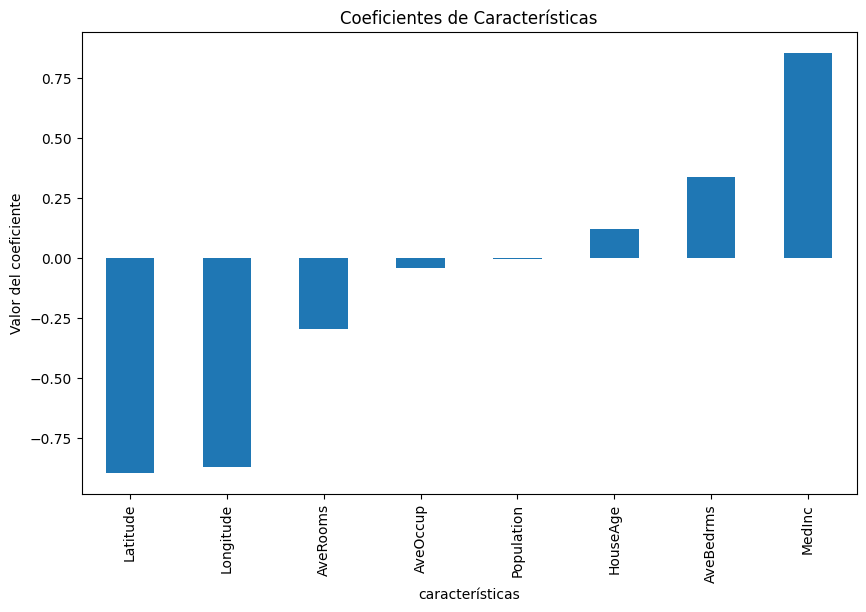

In [25]:
# ---- 9. VISUALIZACIÓN DE LOS COEFICIENTES ----
# Los coeficientes nos indican cuánto influye cada característica en el precio
plt.figure(figsize=(10, 6))
# Convertimos los coeficientes en una serie de pandas para facilitar la visualización
coef = pd.Series(modelo.coef_, index=housing.feature_names)
# Ordenamos y graficamos como barras para ver qué características tienen mayor influencia
coef.sort_values().plot(kind='bar')
plt.title('Coeficientes de Características')
plt.ylabel('Valor del coeficiente')
plt.xlabel('características')
plt.show()
# Interpretación: coeficientes positivos aumentan el precio, negativos lo disminuyen
# El tamaño absoluto indica la magnitud del impacto

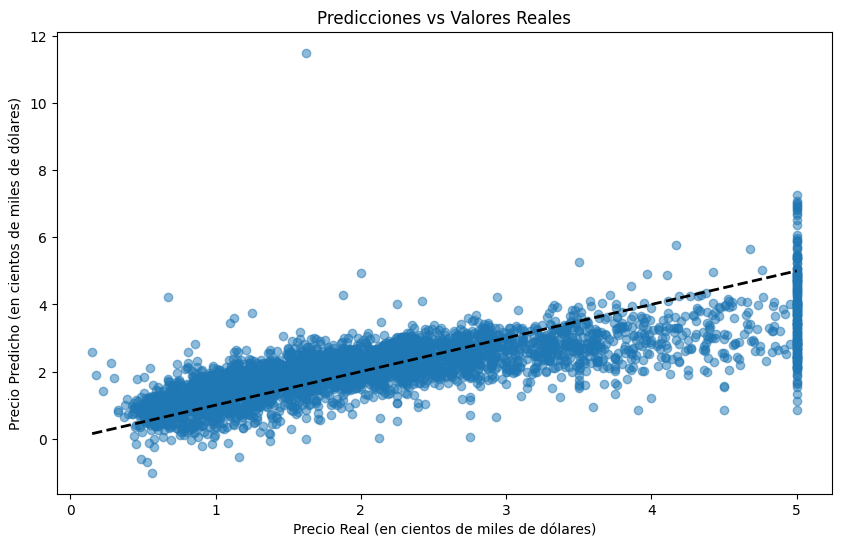

In [26]:
# ---- 10. VISUALIZACIÓN DE PREDICCIONES VS VALORES REALES ----
plt.figure(figsize=(10, 6))
# Graficamos cada punto como (precio real, precio predicho)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Precio Real (en cientos de miles de dólares)')
plt.ylabel('Precio Predicho (en cientos de miles de dólares)')
# Línea diagonal perfecta (si todas las predicciones fueran exactas)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
# Interpretación: puntos cerca de la línea diagonal indican buenas predicciones
# Dispersión alrededor de la línea muestra el error del modelo

In [27]:
# ---- 11. PREDICCIÓN CON NUEVOS DATOS ----
# Simulamos una casa nueva con características específicas
nueva_casa = np.array([[
    3.5,    # MedInc: Ingreso medio del bloque (en $10,000s)
    30.0,   # HouseAge: Edad media de las casas en el bloque (años)
    5.0,    # AveRooms: Número medio de habitaciones por hogar
    1.0,    # AveBedrms: Número medio de dormitorios por hogar
    1500,   # Population: Población del bloque
    500,    # AveOccup: Media de ocupación por hogar
    34.0,   # Latitude: Latitud del bloque
    -118.0  # Longitude: Longitud del bloque
]])

# Importante: debemos normalizar los nuevos datos con el mismo scaler
nueva_casa_scaled = scaler.transform(nueva_casa)

# Hacemos la predicción con el modelo entrenado
precio_pred = modelo.predict(nueva_casa_scaled)[0]
# Convertimos el resultado a dólares (multiplicando por 100,000)
print(f"\nPrecio predicho para la casa de ejemplo: ${precio_pred*100000:.2f}")
# Nota: el dataset original tiene los precios en cientos de miles


Precio predicho para la casa de ejemplo: $14374.38
